In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import plot_tree,to_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error

In [ ]:
 df=pd.read_csv('/content/Climate_change.csv',encoding = "cp1252")

In [ ]:
# Get overall count of null values
print(df.isnull().sum().sum())

# Show count of null values of columns excluding columns without null value
df.isnull().sum()[df.isnull().sum() != 0]

78103


Y1961    1369
Y1962    1334
Y1963    1362
Y1964    1404
Y1965    1375
Y1966    1292
Y1967    1309
Y1968    1311
Y1969    1330
Y1970    1348
Y1971    1353
Y1972    1333
Y1973    1262
Y1974    1282
Y1975    1376
Y1976    1447
Y1977    1399
Y1978    1329
Y1979    1366
Y1980    1373
Y1981    1380
Y1982    1419
Y1983    1451
Y1984    1397
Y1985    1440
Y1986    1388
Y1987    1372
Y1988    1383
Y1989    1399
Y1990    1417
Y1991    1498
Y1992    1302
Y1993    1341
Y1994    1283
Y1995    1247
Y1996    1217
Y1997    1347
Y1998    1286
Y1999    1332
Y2000    1314
Y2001    1415
Y2002    1344
Y2003    1266
Y2004    1241
Y2005    1232
Y2006    1153
Y2007    1122
Y2008    1181
Y2009    1237
Y2010    1221
Y2011    1219
Y2012    1306
Y2013    1229
Y2014    1279
Y2015    1295
Y2016    1308
Y2017    1290
Y2018    1307
Y2019    1291
dtype: int64

In [ ]:
# check number of unique values in cols where count less than 300
df.nunique()[df.nunique() < 300]
# drop Area Code, Months Code, Element Code columns
df.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Unit'],
        axis=1,
        inplace=True)

df

,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,Jun–Jul–Aug,Standard Deviation,0.247,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,Sep–Oct–Nov,Temperature change,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,OECD,Sep–Oct–Nov,Standard Deviation,0.378,0.378,0.378,0.378,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,OECD,Meteorological year,Temperature change,0.165,-0.009,0.134,-0.190,-0.385,-0.166,-0.090,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [ ]:
# Drop rows where Months is giving anything other than January, February etc
df = df[df['Months'].
        isin(['January','February','March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'])]
df

,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,OECD,October,Standard Deviation,0.635,0.635,0.635,0.635,0.635,0.635,0.635,...,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635
9642,OECD,November,Temperature change,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,...,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364,1.030
9643,OECD,November,Standard Deviation,0.435,0.435,0.435,0.435,0.435,0.435,0.435,...,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435
9644,OECD,December,Temperature change,-0.576,0.258,-0.362,-1.303,0.631,-0.021,0.316,...,0.590,1.874,0.934,-0.324,1.994,2.652,0.809,1.635,2.187,2.432


In [ ]:
# check when Element column value is Standard deviation. for same area and month. is the values in years same.
df.groupby(['Area', 'Months'])['Element'].value_counts()

Area         Months     Element           
Afghanistan  April      Standard Deviation    1
                        Temperature change    1
             August     Standard Deviation    1
                        Temperature change    1
             December   Standard Deviation    1
                                             ..
Zimbabwe     November   Temperature change    1
             October    Standard Deviation    1
                        Temperature change    1
             September  Standard Deviation    1
                        Temperature change    1
Name: Element, Length: 6816, dtype: int64

In [ ]:
# Create two data frames where Element = Standard Deviation for one and without as other one
std_df = df[df['Element'] == 'Standard Deviation']
temp_df = df[df['Element'] != 'Standard Deviation']

print(std_df.shape)
print(std_df.head())
print(temp_df.shape)
print(temp_df.head())

(3408, 62)
          Area    Months             Element  Y1961  Y1962  Y1963  Y1964  \
1  Afghanistan   January  Standard Deviation  1.950  1.950  1.950  1.950   
3  Afghanistan  February  Standard Deviation  2.597  2.597  2.597  2.597   
5  Afghanistan     March  Standard Deviation  1.512  1.512  1.512  1.512   
7  Afghanistan     April  Standard Deviation  1.406  1.406  1.406  1.406   
9  Afghanistan       May  Standard Deviation  1.230  1.230  1.230  1.230   

   Y1965  Y1966  Y1967  ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  \
1  1.950  1.950  1.950  ...  1.950  1.950  1.950  1.950  1.950  1.950  1.950   
3  2.597  2.597  2.597  ...  2.597  2.597  2.597  2.597  2.597  2.597  2.597   
5  1.512  1.512  1.512  ...  1.512  1.512  1.512  1.512  1.512  1.512  1.512   
7  1.406  1.406  1.406  ...  1.406  1.406  1.406  1.406  1.406  1.406  1.406   
9  1.230  1.230  1.230  ...  1.230  1.230  1.230  1.230  1.230  1.230  1.230   

   Y2017  Y2018  Y2019  
1  1.950  1.950  1.950  
3

In [ ]:
# Drop all Year columns except first one for standard deviation dataframe
std_df_filtered = std_df.copy()
columns_to_drop = [f'Y{i}' for i in range(1962, 2020)]
std_df_filtered = std_df_filtered.drop(columns=columns_to_drop)

# Drop Element column
std_df_filtered.drop(columns=['Element'], axis=1, inplace=True)

# Rename Y1961 column to StdDev
std_df_filtered.rename(columns={'Y1961': 'StdDev'}, inplace=True)

std_df_filtered

,Area,Months,StdDev
1,Afghanistan,January,1.950
3,Afghanistan,February,2.597
5,Afghanistan,March,1.512
7,Afghanistan,April,1.406
9,Afghanistan,May,1.230
...,...,...,...
9637,OECD,August,0.322
9639,OECD,September,0.322
9641,OECD,October,0.635
9643,OECD,November,0.435


In [ ]:
# Merge DataFrames on common columns
merged_df = pd.merge(std_df_filtered, temp_df, on=['Area', 'Months'])
merged_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [ ]:
# Drop Element column
merged_df.drop(columns=['Element'], axis=1, inplace=True)

print(merged_df.shape)
merged_df.head()

(3408, 62)


,Area,Months,StdDev,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,1.950,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,2.597,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,1.512,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,1.406,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,1.230,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
merged_df.columns

Index(['Area', 'Months', 'StdDev', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965',
       'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973',
       'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981',
       'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [ ]:
# Count the number of rows with missing values
rows_with_missing_values_count = merged_df.isnull().sum(axis=1)

# Exclude rows with zero missing values
non_zero_missing_values_rows = rows_with_missing_values_count[rows_with_missing_values_count > 0]

# Sort rows based on the count of missing values (top to bottom)
sorted_rows_with_missing_values = non_zero_missing_values_rows.sort_values(ascending=False)

# Display the sorted rows with missing values
print("Sorted rows with missing values:")
print(merged_df.loc[sorted_rows_with_missing_values.index])

Sorted rows with missing values:
                Area     Months  StdDev  Y1961  Y1962  Y1963  Y1964  Y1965  \
2506           Sudan   November     NaN    NaN    NaN    NaN    NaN    NaN   
2461     South Sudan   February     NaN    NaN    NaN    NaN    NaN    NaN   
2463     South Sudan      April     NaN    NaN    NaN    NaN    NaN    NaN   
2464     South Sudan        May     NaN    NaN    NaN    NaN    NaN    NaN   
2465     South Sudan       June     NaN    NaN    NaN    NaN    NaN    NaN   
...              ...        ...     ...    ...    ...    ...    ...    ...   
621          Comoros    October   0.429  0.481 -0.019 -0.335 -0.649 -0.249   
1962            Oman       July   0.634 -0.124    NaN  0.218  0.472 -0.220   
620          Comoros  September   0.414  0.022  0.391 -0.792 -0.492 -0.170   
617          Comoros       June   0.351  0.418 -0.537 -0.321 -0.665 -0.693   
36    American Samoa    January   0.429  0.565 -0.230 -0.066  0.222 -0.836   

      Y1966  Y1967  ...  Y2010

In [ ]:
# Check for missing values in each column and sum them up
missing_values_count = merged_df.loc[:, merged_df.isnull().sum() > 0].isnull().sum()

# Sort the missing values count from high to low
missing_values_count = missing_values_count.sort_values(ascending=False)


# Display the count of missing values for each column
print("Count of missing values in each column:")
print(missing_values_count)

# Count the number of rows with missing values
rows_with_missing_values_count = merged_df.isnull().any(axis=1).sum()
print(f"\nCount of rows with missing values: {rows_with_missing_values_count}")

# All year column has missing values

Count of missing values in each column:
Y1964     494
StdDev    489
Y1991     488
Y1983     487
Y1976     485
Y1985     483
Y1963     481
Y1965     479
Y1982     479
Y1961     477
Y1990     475
Y1962     471
Y1984     468
Y1986     467
Y1989     465
Y1970     464
Y1977     463
Y1971     463
Y1975     462
Y1988     462
Y1981     461
Y1987     461
Y1969     459
Y1967     456
Y1972     456
Y1980     454
Y1968     453
Y1979     452
Y1966     444
Y1978     441
Y1974     429
Y1973     423
Y2001     306
Y1997     290
Y1992     288
Y1993     287
Y2002     281
Y1999     278
Y1998     264
Y1994     263
Y2000     262
Y1995     254
Y2018     246
Y2016     245
Y2003     244
Y2012     243
Y2019     242
Y2015     238
Y1996     238
Y2004     237
Y2017     235
Y2014     232
Y2005     229
Y2009     226
Y2010     223
Y2011     215
Y2008     213
Y2013     213
Y2006     197
Y2007     189
dtype: int64

Count of rows with missing values: 1030


In [ ]:
# Drop rows with missing values in the original DataFrame
merged_df.dropna(inplace=True)

# Display the modified DataFrame
print(merged_df)
merged_df.isnull().any(axis=1).sum() # Check count of null values.

print("Updated dataset size is: ",merged_df.shape)

             Area     Months  StdDev  Y1961  Y1962  Y1963  Y1964  Y1965  \
0     Afghanistan    January   1.950  0.777  0.062  2.744 -5.232  1.868   
1     Afghanistan   February   2.597 -1.743  2.465  3.919 -0.202 -0.096   
2     Afghanistan      March   1.512  0.516  1.336  0.403  1.659 -0.909   
3     Afghanistan      April   1.406 -1.709  0.117  0.919 -0.533 -1.816   
4     Afghanistan        May   1.230  1.412 -0.092 -0.690 -0.160 -0.190   
...           ...        ...     ...    ...    ...    ...    ...    ...   
3403         OECD     August   0.322  0.064  0.130  0.036 -0.361 -0.366   
3404         OECD  September   0.322  0.040 -0.050  0.260 -0.114 -0.626   
3405         OECD    October   0.635  0.090  0.765  1.305 -0.355 -0.092   
3406         OECD   November   0.435 -0.023  0.668  0.429 -0.003  0.111   
3407         OECD   December   0.697 -0.576  0.258 -0.362 -1.303  0.631   

      Y1966  Y1967  ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  \
0     3.629 -1.432  ...

In [ ]:
Y_real=merged_df['Y2019']
print(max(Y_real))
print(min(Y_real))

7.215
-2.644


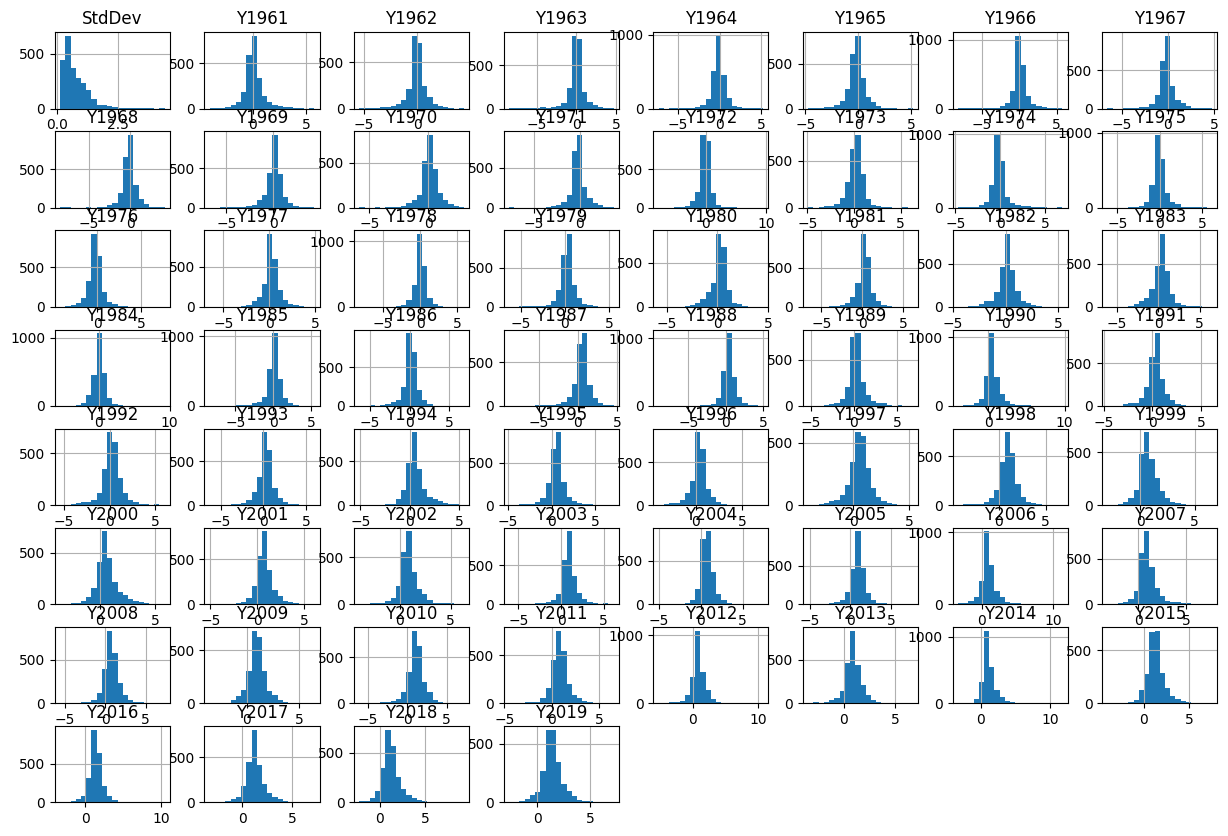

In [ ]:
import matplotlib.pyplot as plt
merged_df.hist(bins=20, figsize=(15, 10))
plt.show()

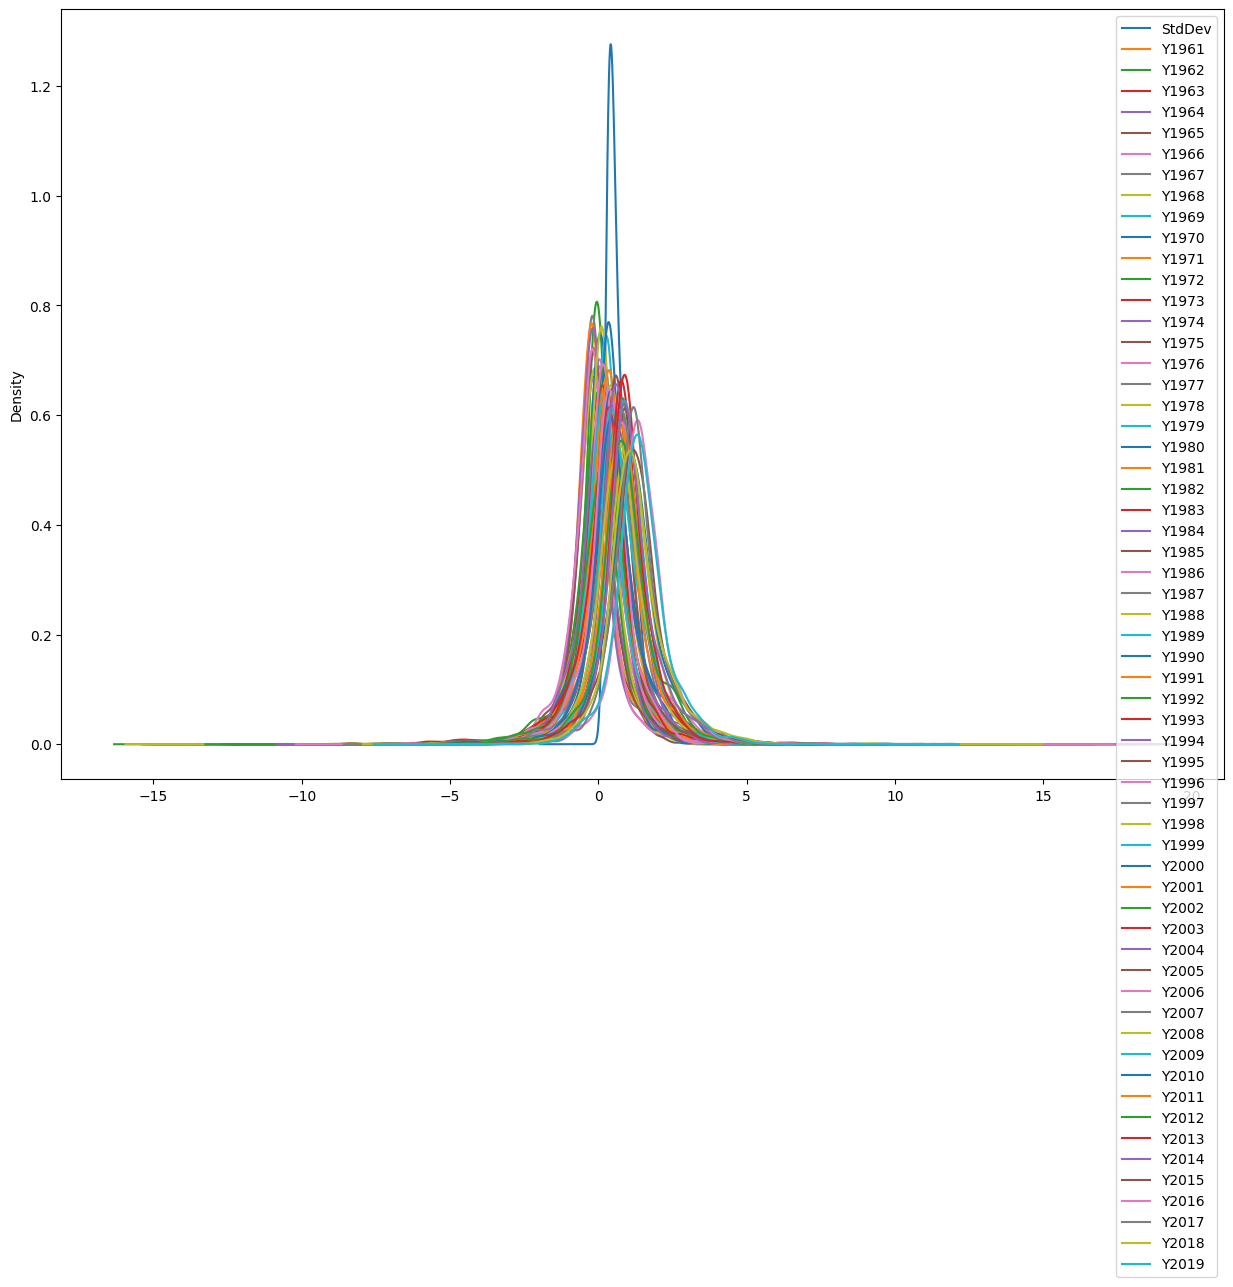

In [ ]:
merged_df.plot(kind='kde', figsize=(15, 10))
plt.show()

In [ ]:
descriptive_stats = merged_df.describe()
print(descriptive_stats)

            StdDev        Y1961        Y1962        Y1963        Y1964  \
count  2378.000000  2378.000000  2378.000000  2378.000000  2378.000000   
mean      0.768992     0.146008    -0.027422    -0.024879    -0.122892   
std       0.516293     0.913590     0.882198     1.109121     0.892862   
min       0.142000    -4.018000    -5.391000    -8.483000    -7.309000   
25%       0.399000    -0.309500    -0.327500    -0.361750    -0.504000   
50%       0.601000     0.050000    -0.030000     0.031500    -0.122000   
75%       1.015000     0.461750     0.308000     0.431000     0.290750   
max       4.373000     5.771000     4.366000     4.666000     5.233000   

             Y1965        Y1966        Y1967        Y1968        Y1969  ...  \
count  2378.000000  2378.000000  2378.000000  2378.000000  2378.000000  ...   
mean     -0.198511     0.107353    -0.147565    -0.159941     0.092898  ...   
std       0.823013     0.979651     0.848916     0.885044     0.965482  ...   
min      -4.72800

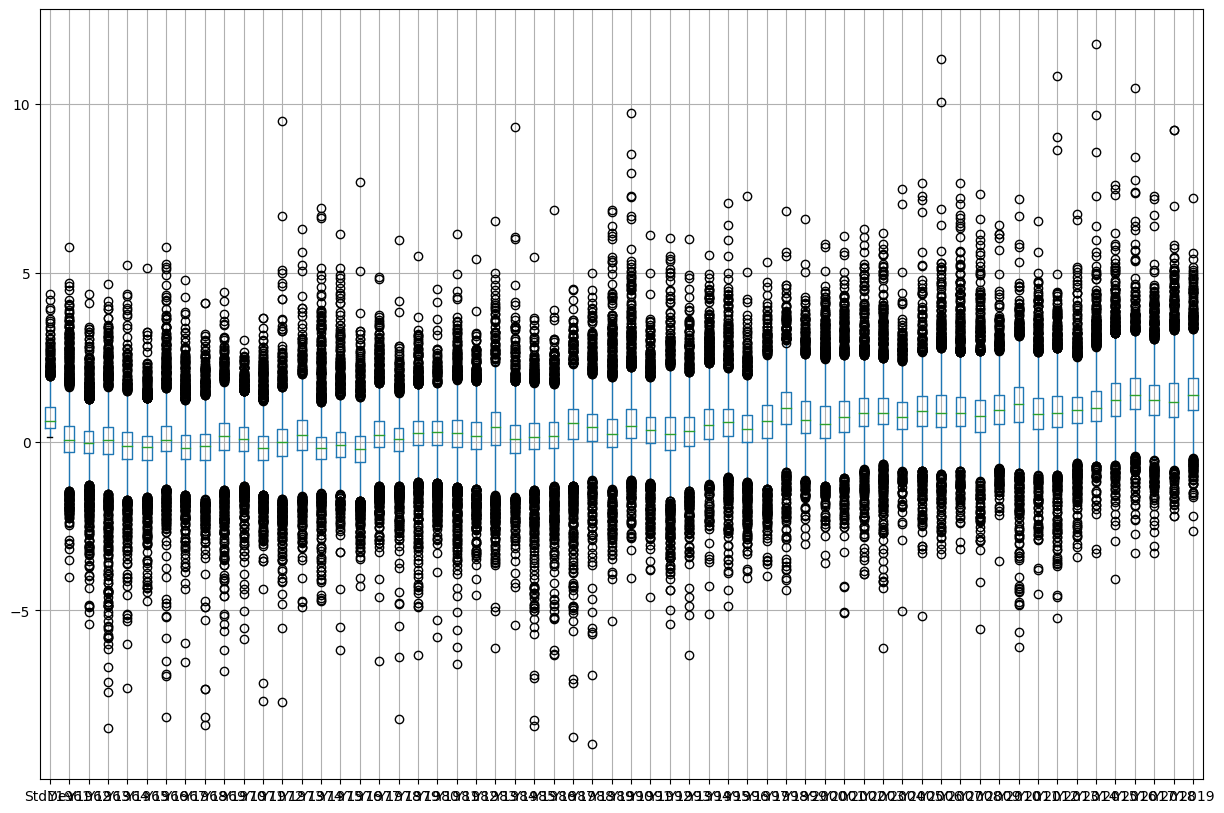

In [ ]:
merged_df.boxplot(figsize=(15, 10))
plt.show()

# Given dataset has lot of outliers

In [ ]:
import seaborn as sns

# Pairplot
#sns.pairplot(merged_df)
#plt.show()

In [ ]:
merged_df.columns

Index(['Area', 'Months', 'StdDev', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965',
       'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973',
       'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981',
       'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [ ]:
sns.pairplot(merged_df[merged_df.columns[:20]])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from scipy.stats import zscore

# Function to remove outliers using Z-Score for all numerical columns
def remove_outliers_zscore(df, threshold=3):
    # Calculate Z-Score for numerical columns
    z_scores = zscore(df.select_dtypes(['int64', 'float64']))

    # Create a mask to identify outliers based on the threshold
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

    # Apply the mask to the DataFrame
    df_no_outliers = df.loc[~outliers_mask.any(axis=1)]

    return df_no_outliers

# Remove outliers using Z-Score for all numerical columns
merged_df_no_outliers_zscore = remove_outliers_zscore(merged_df)

# Display the DataFrame after removing outliers using Z-Score
print("DataFrame after removing outliers using Z-Score:")
print(merged_df_no_outliers_zscore)
print(merged_df.shape)

DataFrame after removing outliers using Z-Score:
             Area     Months  StdDev  Y1961  Y1962  Y1963  Y1964  Y1965  \
5     Afghanistan       June   0.930 -0.058 -1.061  1.164 -0.519 -0.422   
6     Afghanistan       July   0.585  0.884  0.292  0.348 -0.142  0.116   
7     Afghanistan     August   0.773  0.391 -0.220  0.094  0.671 -0.686   
8     Afghanistan  September   0.832  1.445 -1.797  0.163 -0.253 -0.661   
10    Afghanistan   November   1.391 -0.540 -2.171  0.584 -0.574  1.820   
...           ...        ...     ...    ...    ...    ...    ...    ...   
3403         OECD     August   0.322  0.064  0.130  0.036 -0.361 -0.366   
3404         OECD  September   0.322  0.040 -0.050  0.260 -0.114 -0.626   
3405         OECD    October   0.635  0.090  0.765  1.305 -0.355 -0.092   
3406         OECD   November   0.435 -0.023  0.668  0.429 -0.003  0.111   
3407         OECD   December   0.697 -0.576  0.258 -0.362 -1.303  0.631   

      Y1966  Y1967  ...  Y2010  Y2011  Y2012  Y201

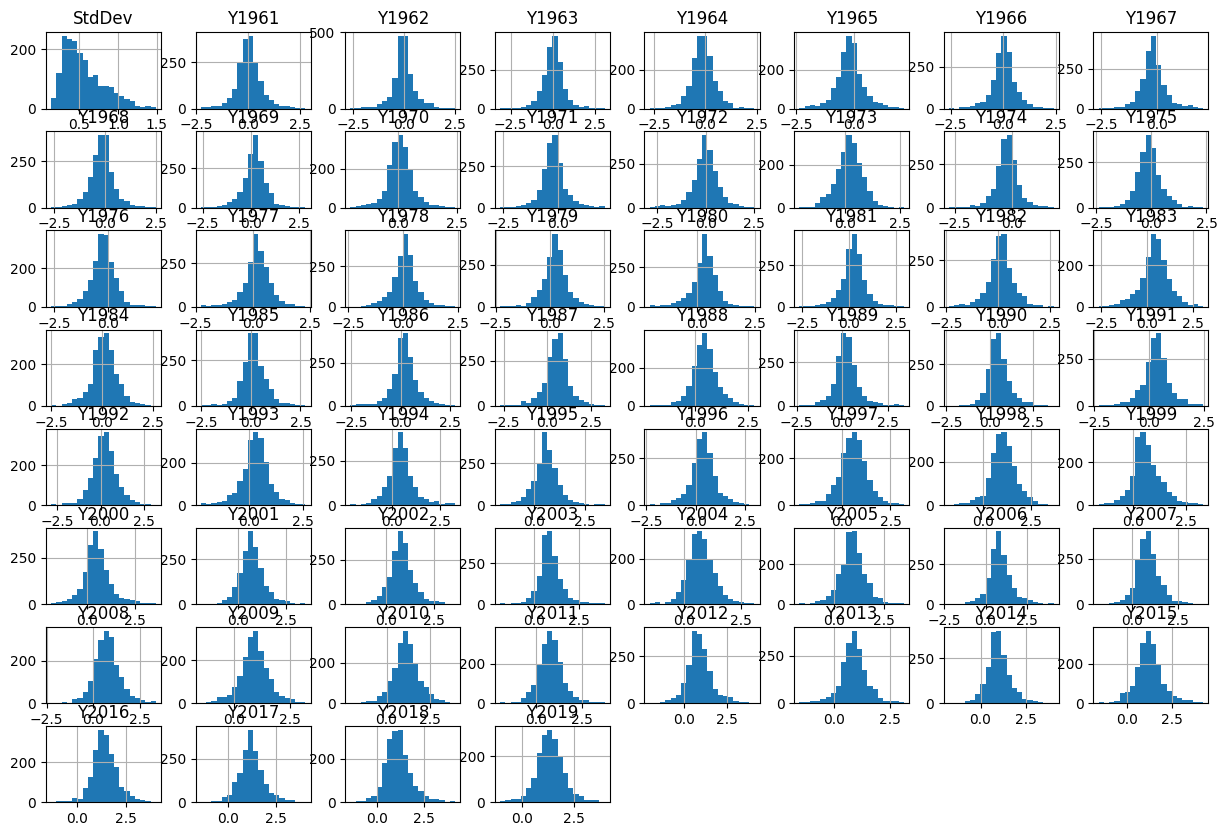

In [ ]:
merged_df_no_outliers_zscore.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
merged_df_no_outliers_zscore.shape
df_final = merged_df_no_outliers_zscore.copy()
df_final.shape

(1830, 62)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical columns for label encoding
categorical_columns = ['Area', 'Months']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_final[column] = label_encoder.fit_transform(df_final[column])

# Display the DataFrame after label encoding
print("DataFrame after Label Encoding:")
print(df_final.head())

DataFrame after Label Encoding:
    Area  Months  StdDev  Y1961  Y1962  Y1963  Y1964  Y1965  Y1966  Y1967  \
5      0       6   0.930 -0.058 -1.061  1.164 -0.519 -0.422  1.274 -0.722   
6      0       5   0.585  0.884  0.292  0.348 -0.142  0.116 -0.267  0.332   
7      0       1   0.773  0.391 -0.220  0.094  0.671 -0.686  0.049  0.055   
8      0      11   0.832  1.445 -1.797  0.163 -0.253 -0.661 -0.403  0.583   
10     0       9   1.391 -0.540 -2.171  0.584 -0.574  1.820 -2.574  1.245   

    ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
5   ...  0.594  2.450  0.305  1.924  1.492  1.289  1.586  2.002  1.786 -0.289  
6   ...  0.494  0.532  0.973  1.126  0.671  1.092  1.079  0.901  1.815  1.885  
7   ...  0.587  1.930  1.356  0.886  0.706  0.589  0.311  0.102  0.982  0.773  
8   ...  0.030  1.408  0.495  2.586  2.268  0.172  3.016  0.930  1.063  2.004  
10  ...  0.975  1.000  1.042  0.975 -0.403  0.512 -1.345  2.089  0.882 -1.051  

[5 rows x 62 columns]


In [ ]:
df_final_copy=df_final.copy()
df_final = df_final.iloc[:, :-1]
df_final

,Area,Months,StdDev,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
5,0,6,0.930,-0.058,-1.061,1.164,-0.519,-0.422,1.274,-0.722,...,-1.233,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786
6,0,5,0.585,0.884,0.292,0.348,-0.142,0.116,-0.267,0.332,...,0.132,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815
7,0,1,0.773,0.391,-0.220,0.094,0.671,-0.686,0.049,0.055,...,1.469,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982
8,0,11,0.832,1.445,-1.797,0.163,-0.253,-0.661,-0.403,0.583,...,1.273,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063
10,0,9,1.391,-0.540,-2.171,0.584,-0.574,1.820,-2.574,1.245,...,0.926,0.975,1.000,1.042,0.975,-0.403,0.512,-1.345,2.089,0.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,135,1,0.322,0.064,0.130,0.036,-0.361,-0.366,-0.296,-0.079,...,1.023,1.084,1.277,1.143,1.169,0.743,0.900,1.175,0.971,0.854
3404,135,11,0.322,0.040,-0.050,0.260,-0.114,-0.626,0.235,0.175,...,1.428,0.822,1.318,1.370,1.477,0.964,1.289,1.337,1.291,0.757
3405,135,10,0.635,0.090,0.765,1.305,-0.355,-0.092,-0.556,0.517,...,-0.249,0.964,1.117,0.544,1.321,1.675,1.658,0.916,1.413,0.622
3406,135,9,0.435,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,...,2.101,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364


In [ ]:
Y_real=df_final_copy[df_final_copy['Area']==1]
#Y_real=Y_real['Y2019']
Y_real

,Area,Months,StdDev,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
2976,1,4,0.488,0.105,-0.337,0.448,-0.090,-0.140,0.578,-0.540,...,1.602,0.643,0.016,0.896,1.070,0.243,1.366,0.636,0.670,0.759
2977,1,3,0.483,-0.814,-0.499,0.569,0.023,-0.120,0.090,-0.195,...,2.412,0.632,0.068,1.003,0.720,0.921,1.303,0.958,1.130,0.654
2978,1,7,0.484,-0.492,0.193,-0.443,0.885,-0.094,-0.353,-0.420,...,1.692,1.147,0.528,1.797,0.714,0.937,1.655,1.021,1.520,1.337
2979,1,0,0.316,0.318,-0.003,-0.203,-0.122,-0.668,0.001,0.055,...,2.105,1.151,0.954,1.043,1.162,0.942,1.956,1.306,1.285,1.645
2980,1,8,0.341,0.684,-0.224,-0.719,-0.070,-0.266,-0.016,0.100,...,1.611,1.138,1.054,1.137,1.142,1.666,1.404,1.630,1.200,1.684
2981,1,6,0.292,0.280,-0.135,0.004,-0.249,-0.325,0.302,-0.069,...,1.241,1.092,1.093,1.009,1.242,1.164,1.465,1.471,1.201,1.637
2982,1,5,0.313,0.047,0.190,0.246,-0.617,0.109,0.494,-0.334,...,1.181,1.196,0.943,0.938,1.475,1.607,1.174,1.494,1.520,1.728
2983,1,1,0.303,-0.422,-0.118,0.106,-0.436,-0.118,0.417,-0.248,...,1.093,0.943,0.984,0.633,1.206,1.629,1.218,1.274,1.341,1.632
2984,1,11,0.304,-0.257,0.088,0.439,-0.616,-0.087,-0.029,-0.247,...,1.103,1.126,0.730,0.937,1.106,1.396,1.342,1.546,1.364,1.411
2985,1,10,0.304,-0.322,0.268,0.138,-0.470,-0.191,0.158,-0.246,...,1.416,0.606,1.230,0.962,0.960,2.000,1.908,1.060,1.220,1.460


In [ ]:
Y_real=Y_real['Y2019']
max(Y_real)

1.883

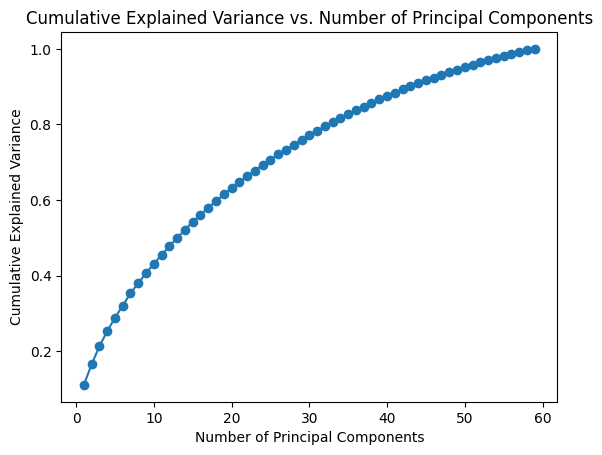

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features using the training data
scaler = StandardScaler()
df_final_standardized = scaler.fit_transform(df_final)
df_final_pca=df_final_standardized[:,2:]
# Create a PCA instance
n_components_range = range(1, min(df_final_pca.shape[0], df_final_pca.shape[1]) + 1)
explained_variance_ratio_cumulative = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df_final_pca)
    explained_variance_ratio_cumulative.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance
plt.plot(n_components_range, explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

In [ ]:
df_final_standardized.shape

(1830, 61)

In [ ]:
# Set a threshold for the total variance to retain (e.g., 95%)
cumulative_variance_threshold = 0.95

# Find the number of components that satisfy the threshold
n_components_threshold = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= cumulative_variance_threshold) + 1

print("Optimal Number of Components:", n_components_threshold)

Optimal Number of Components: 50


In [ ]:
df_final_standardized

array([[-1.70481529,  0.10614288,  1.4376538 , ...,  0.26701656,
         1.1530491 ,  0.87355134],
       [-1.70481529, -0.17866867,  0.09605297, ..., -0.4976811 ,
        -0.46157898,  0.91376023],
       [-1.70481529, -1.31791486,  0.8271282 , ..., -1.65603969,
        -1.63332088, -0.24120564],
       ...,
       [ 0.64593551,  1.24538908,  0.29048787, ..., -0.74353065,
         0.28927441, -0.74035056],
       [ 0.64593551,  0.96057753, -0.48725174, ...,  1.42386686,
        -0.49530872, -1.09807109],
       [ 0.64593551, -1.03310331,  0.53158715, ..., -0.90491654,
         0.61483974,  1.42954332]])

In [ ]:
df_final_pca=df_final_standardized[:,2:]
df_final_pca.shape

(1830, 59)

In [ ]:
df_final_pca

array([[ 1.4376538 , -0.16584395, -1.91225565, ...,  0.26701656,
         1.1530491 ,  0.87355134],
       [ 0.09605297,  1.3694668 ,  0.5370551 , ..., -0.4976811 ,
        -0.46157898,  0.91376023],
       [ 0.8271282 ,  0.56595491, -0.38980898, ..., -1.65603969,
        -1.63332088, -0.24120564],
       ...,
       [ 0.29048787,  0.0753726 ,  1.3933182 , ..., -0.74353065,
         0.28927441, -0.74035056],
       [-0.48725174, -0.10879949,  1.21772091, ...,  1.42386686,
        -0.49530872, -1.09807109],
       [ 0.53158715, -1.01010188,  0.47550553, ..., -0.90491654,
         0.61483974,  1.42954332]])

In [ ]:
df_final_pca.shape

(1830, 59)

In [ ]:
# Create a PCA instance
n_components = n_components_threshold  # Set the desired number of components
pca = PCA(n_components=n_components)

# Standardize the features using the training data
#scaler = StandardScaler()
#df_final_standardized = scaler.fit_transform(df_final)

# Fit and transform the training data using PCA
# Transform the test data using the same PCA instance

# Fit and transform the training data using PCA
df_final_standardized_pca = pca.fit_transform(df_final_pca)

# Transform the test data using the same PCA instance
#X_test_standardized = scaler.transform(X_test)
#X_test_pca = pca.transform(X_test_standardized)

In [ ]:
print(df_final_standardized_pca.shape)
column_names = [f'Feature_{i}' for i in range(df_final_standardized_pca.shape[1])]

df_final_standardized_pca = pd.DataFrame(df_final_standardized_pca, columns=column_names)
df_final_standardized_pca.reset_index(drop=True)

(1830, 50)


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
0,1.791784,-1.612923,0.738843,2.145064,-1.232086,0.014162,-4.243396,-0.627772,2.898597,0.822021,...,-0.439289,0.564927,-1.337709,0.250013,0.324863,0.500520,0.469047,1.676988,0.292599,-0.525158
1,-1.077729,-0.061701,0.561974,1.601182,1.054889,-0.803381,-0.027278,-0.754707,0.116085,-0.586483,...,1.194794,-0.081639,-0.547729,0.900157,-0.104608,0.243071,-1.668061,0.467293,1.342127,-0.223948
2,0.062733,-1.461718,-0.064526,3.561211,0.850884,-1.222257,-0.331981,1.547876,-0.905352,-0.121975,...,0.024258,-0.361301,-0.136117,0.168614,-1.790379,-0.089219,-1.016309,0.528604,0.517628,-0.139143
3,1.464004,-0.851699,0.843229,1.597026,3.342811,1.487212,-0.311826,1.526047,-1.345957,-2.282186,...,-0.071091,-1.118002,-0.576478,0.980910,-0.223473,-0.352785,0.083683,-0.750068,0.316423,-1.317345
4,2.737181,-0.205702,-4.633149,3.019207,0.539558,-1.302123,-2.386298,-1.920368,1.491162,7.706907,...,1.015088,-0.222911,-1.435375,-0.260216,-0.420181,1.012852,0.290495,0.065423,0.185223,2.295624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,-0.241282,-0.863097,-0.260268,0.819213,-0.015503,-0.545741,0.354104,-1.086847,-0.882034,-0.524987,...,-0.488861,0.379336,0.155772,-0.148886,0.593600,0.107325,-0.094008,-0.063115,0.034117,-0.290766
1826,0.777600,0.302220,0.490435,0.609886,1.304696,-0.458571,0.397450,0.064052,-0.786513,0.090160,...,-0.219022,-0.028037,-0.300894,-0.015743,-0.262118,0.214206,-0.081632,0.795044,0.236556,-0.235636
1827,-0.818687,0.244530,1.717310,1.240138,0.687579,-2.842395,-0.780646,-1.167533,-0.447942,1.927484,...,0.066850,-0.121590,0.608285,0.940569,0.047461,0.069652,0.097687,0.451838,0.473147,0.681706
1828,-0.689289,1.516260,1.352930,-0.974075,0.313273,-0.163546,0.999766,0.885353,-2.219966,0.745958,...,-0.567608,0.370214,-0.427587,-0.214844,-0.654247,-0.315445,-1.146094,0.423581,-0.131080,-0.440004


In [ ]:
df_final.shape
df_final.reset_index(drop=True,inplace=True)
df_final

,Area,Months,StdDev,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,0,6,0.930,-0.058,-1.061,1.164,-0.519,-0.422,1.274,-0.722,...,-1.233,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786
1,0,5,0.585,0.884,0.292,0.348,-0.142,0.116,-0.267,0.332,...,0.132,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815
2,0,1,0.773,0.391,-0.220,0.094,0.671,-0.686,0.049,0.055,...,1.469,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982
3,0,11,0.832,1.445,-1.797,0.163,-0.253,-0.661,-0.403,0.583,...,1.273,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063
4,0,9,1.391,-0.540,-2.171,0.584,-0.574,1.820,-2.574,1.245,...,0.926,0.975,1.000,1.042,0.975,-0.403,0.512,-1.345,2.089,0.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,135,1,0.322,0.064,0.130,0.036,-0.361,-0.366,-0.296,-0.079,...,1.023,1.084,1.277,1.143,1.169,0.743,0.900,1.175,0.971,0.854
1826,135,11,0.322,0.040,-0.050,0.260,-0.114,-0.626,0.235,0.175,...,1.428,0.822,1.318,1.370,1.477,0.964,1.289,1.337,1.291,0.757
1827,135,10,0.635,0.090,0.765,1.305,-0.355,-0.092,-0.556,0.517,...,-0.249,0.964,1.117,0.544,1.321,1.675,1.658,0.916,1.413,0.622
1828,135,9,0.435,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,...,2.101,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364


In [ ]:
df_final_standardized_pca

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
0,1.791784,-1.612923,0.738843,2.145064,-1.232086,0.014162,-4.243396,-0.627772,2.898597,0.822021,...,-0.439289,0.564927,-1.337709,0.250013,0.324863,0.500520,0.469047,1.676988,0.292599,-0.525158
1,-1.077729,-0.061701,0.561974,1.601182,1.054889,-0.803381,-0.027278,-0.754707,0.116085,-0.586483,...,1.194794,-0.081639,-0.547729,0.900157,-0.104608,0.243071,-1.668061,0.467293,1.342127,-0.223948
2,0.062733,-1.461718,-0.064526,3.561211,0.850884,-1.222257,-0.331981,1.547876,-0.905352,-0.121975,...,0.024258,-0.361301,-0.136117,0.168614,-1.790379,-0.089219,-1.016309,0.528604,0.517628,-0.139143
3,1.464004,-0.851699,0.843229,1.597026,3.342811,1.487212,-0.311826,1.526047,-1.345957,-2.282186,...,-0.071091,-1.118002,-0.576478,0.980910,-0.223473,-0.352785,0.083683,-0.750068,0.316423,-1.317345
4,2.737181,-0.205702,-4.633149,3.019207,0.539558,-1.302123,-2.386298,-1.920368,1.491162,7.706907,...,1.015088,-0.222911,-1.435375,-0.260216,-0.420181,1.012852,0.290495,0.065423,0.185223,2.295624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,-0.241282,-0.863097,-0.260268,0.819213,-0.015503,-0.545741,0.354104,-1.086847,-0.882034,-0.524987,...,-0.488861,0.379336,0.155772,-0.148886,0.593600,0.107325,-0.094008,-0.063115,0.034117,-0.290766
1826,0.777600,0.302220,0.490435,0.609886,1.304696,-0.458571,0.397450,0.064052,-0.786513,0.090160,...,-0.219022,-0.028037,-0.300894,-0.015743,-0.262118,0.214206,-0.081632,0.795044,0.236556,-0.235636
1827,-0.818687,0.244530,1.717310,1.240138,0.687579,-2.842395,-0.780646,-1.167533,-0.447942,1.927484,...,0.066850,-0.121590,0.608285,0.940569,0.047461,0.069652,0.097687,0.451838,0.473147,0.681706
1828,-0.689289,1.516260,1.352930,-0.974075,0.313273,-0.163546,0.999766,0.885353,-2.219966,0.745958,...,-0.567608,0.370214,-0.427587,-0.214844,-0.654247,-0.315445,-1.146094,0.423581,-0.131080,-0.440004


In [ ]:
df_final_standardized_pca['country']=df_final['Area']
#df_final_standardized_pca['country']=df_final['Months']
df_final_standardized_pca

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,country
0,1.791784,-1.612923,0.738843,2.145064,-1.232086,0.014162,-4.243396,-0.627772,2.898597,0.822021,...,0.564927,-1.337709,0.250013,0.324863,0.500520,0.469047,1.676988,0.292599,-0.525158,0
1,-1.077729,-0.061701,0.561974,1.601182,1.054889,-0.803381,-0.027278,-0.754707,0.116085,-0.586483,...,-0.081639,-0.547729,0.900157,-0.104608,0.243071,-1.668061,0.467293,1.342127,-0.223948,0
2,0.062733,-1.461718,-0.064526,3.561211,0.850884,-1.222257,-0.331981,1.547876,-0.905352,-0.121975,...,-0.361301,-0.136117,0.168614,-1.790379,-0.089219,-1.016309,0.528604,0.517628,-0.139143,0
3,1.464004,-0.851699,0.843229,1.597026,3.342811,1.487212,-0.311826,1.526047,-1.345957,-2.282186,...,-1.118002,-0.576478,0.980910,-0.223473,-0.352785,0.083683,-0.750068,0.316423,-1.317345,0
4,2.737181,-0.205702,-4.633149,3.019207,0.539558,-1.302123,-2.386298,-1.920368,1.491162,7.706907,...,-0.222911,-1.435375,-0.260216,-0.420181,1.012852,0.290495,0.065423,0.185223,2.295624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,-0.241282,-0.863097,-0.260268,0.819213,-0.015503,-0.545741,0.354104,-1.086847,-0.882034,-0.524987,...,0.379336,0.155772,-0.148886,0.593600,0.107325,-0.094008,-0.063115,0.034117,-0.290766,135
1826,0.777600,0.302220,0.490435,0.609886,1.304696,-0.458571,0.397450,0.064052,-0.786513,0.090160,...,-0.028037,-0.300894,-0.015743,-0.262118,0.214206,-0.081632,0.795044,0.236556,-0.235636,135
1827,-0.818687,0.244530,1.717310,1.240138,0.687579,-2.842395,-0.780646,-1.167533,-0.447942,1.927484,...,-0.121590,0.608285,0.940569,0.047461,0.069652,0.097687,0.451838,0.473147,0.681706,135
1828,-0.689289,1.516260,1.352930,-0.974075,0.313273,-0.163546,0.999766,0.885353,-2.219966,0.745958,...,0.370214,-0.427587,-0.214844,-0.654247,-0.315445,-1.146094,0.423581,-0.131080,-0.440004,135


In [ ]:
df_final_standardized_pca['Month']=df_final['Months']

In [ ]:
df_final

,Area,Months,StdDev,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,0,6,0.930,-0.058,-1.061,1.164,-0.519,-0.422,1.274,-0.722,...,-1.233,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786
1,0,5,0.585,0.884,0.292,0.348,-0.142,0.116,-0.267,0.332,...,0.132,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815
2,0,1,0.773,0.391,-0.220,0.094,0.671,-0.686,0.049,0.055,...,1.469,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982
3,0,11,0.832,1.445,-1.797,0.163,-0.253,-0.661,-0.403,0.583,...,1.273,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063
4,0,9,1.391,-0.540,-2.171,0.584,-0.574,1.820,-2.574,1.245,...,0.926,0.975,1.000,1.042,0.975,-0.403,0.512,-1.345,2.089,0.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,135,1,0.322,0.064,0.130,0.036,-0.361,-0.366,-0.296,-0.079,...,1.023,1.084,1.277,1.143,1.169,0.743,0.900,1.175,0.971,0.854
1826,135,11,0.322,0.040,-0.050,0.260,-0.114,-0.626,0.235,0.175,...,1.428,0.822,1.318,1.370,1.477,0.964,1.289,1.337,1.291,0.757
1827,135,10,0.635,0.090,0.765,1.305,-0.355,-0.092,-0.556,0.517,...,-0.249,0.964,1.117,0.544,1.321,1.675,1.658,0.916,1.413,0.622
1828,135,9,0.435,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,...,2.101,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364


In [ ]:
y=df_final_copy['Y2019']

In [ ]:
X=df_final_standardized_pca.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1464, 52)
Shape of X_test: (366, 52)
Shape of y_train: (1464,)
Shape of y_test: (366,)


In [ ]:
param_grid_R = {'alpha': [233,233.2,233.4,233.5,233.7,233.9]}
ridge_model=Ridge(random_state=0)
grid_search_Ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid_R,
                           cv=5
                          )

grid_search_Ridge.fit(X_train, y_train)
print("Best parameters found: ", grid_search_Ridge.best_params_)

Best parameters found:  {'alpha': 233.5}


In [ ]:
model_R=Ridge(alpha=233.5)

In [ ]:
model_R.fit(X_train,y_train)

Ridge(alpha=233.5)

In [ ]:
pred_R=model_R.predict(X_test)


In [ ]:
print(pred_R)

[ 0.59429145  0.85031964  1.37690815  0.96319158  1.31098243  1.41716955
  1.52075027  0.99660402  0.80053696  2.5398205   1.18336084  1.08987848
  0.74777799  0.65302343  1.42859957  1.27037322  1.51205891  1.29719518
  0.89449414  1.45016321  1.87811924  1.44480609  1.73525261  1.30555917
  1.35948726  1.45656098  1.92548755  0.81838749  1.28105119  0.70592504
  2.35834647  1.57923982  1.69637079  2.3321098   1.30598504  1.0577282
  2.24174236  2.01417055  1.13295262  1.25537023  1.11179235  2.40321966
  0.9869304   1.37564334  1.04672686  1.01182302  1.662475    0.98235029
  1.23163637  1.30408984  1.36997465  1.54910138  1.27653015  0.84008693
  1.58945128  1.29453514  1.47509687  1.34340853  1.00081755  0.84736636
  1.45139219  0.94458848  1.2379041   1.23093083  1.32692787  1.24333877
  1.19729685  1.62237067  1.90720587  1.6119133   1.6207474   1.8105711
  0.9524961   2.04061037  1.24564589  1.4186027   0.73928345  1.51435247
  1.2461994   1.47592664  0.98797168  1.62809921  2.0

In [ ]:
MSE_R=mean_squared_error(pred_R,y_test)
MAE_R = mean_absolute_error(pred_R,y_test)
RMSE_R = np.sqrt(mean_squared_error(pred_R,y_test))
MAPE_R = mean_absolute_percentage_error(pred_R,y_test)
print(MSE_R)
print(MAE_R)
print(RMSE_R)
print(MAPE_R)

0.2960995254015004
0.40280695609144324
0.544150278325299
0.3526182491079035


In [ ]:
param_grid_DC = {'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],'max_depth':[2,3,4,5],
                 'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
DC=DecisionTreeRegressor(random_state=0)
grid_search_DC = GridSearchCV(estimator=DC,
                           param_grid=param_grid_DC,
                           cv=5
                          )

grid_search_DC.fit(X_train, y_train)
print("Best parameters found: ", grid_search_DC.best_params_)

Best parameters found:  {'criterion': 'absolute_error', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
DC=DecisionTreeRegressor(criterion = 'absolute_error',max_depth = 2,min_samples_leaf= 1,min_samples_split= 2)

In [ ]:
DC.fit(X_train,y_train)
pred_DC=DC.predict(X_test)

In [ ]:
MSE_DC=mean_squared_error(pred_DC,y_test)
MAE_DC = mean_absolute_error(pred_DC,y_test)
RMSE_DC = np.sqrt(mean_squared_error(pred_DC,y_test))
MAPE_DC = mean_absolute_percentage_error(pred_DC,y_test)
print(MSE_DC)
print(MAE_DC)
print(RMSE_DC)
print(MAPE_DC)

0.36766730191256836
0.4290956284153006
0.6063557552399156
0.33139048441595065


In [ ]:
param_grid_RFR = {'n_estimators':[170]}
RFR=RandomForestRegressor(random_state=0)
grid_search_RFR = GridSearchCV(estimator=RFR,
                           param_grid=param_grid_RFR,
                           cv=5)
grid_search_RFR.fit(X_train, y_train)
print("Best parameters found: ", grid_search_RFR.best_params_)

Best parameters found:  {'n_estimators': 170}


In [ ]:
bestRFR=RandomForestRegressor(n_estimators=170)
bestRFR.fit(X_train,y_train)
pred_RFR=bestRFR.predict(X_test)

In [ ]:
MSE_RFR=mean_squared_error(pred_RFR,y_test)
MAE_RFR = mean_absolute_error(pred_RFR,y_test)
RMSE_RFR = np.sqrt(mean_squared_error(pred_RFR,y_test))
MAPE_RFR = mean_absolute_percentage_error(pred_RFR,y_test)
print(MSE_RFR)
print(MAE_RFR)
print(RMSE_RFR)
print(MAPE_RFR)

0.2587670587815532
0.3594067180970749
0.5086915163255165
0.31703409462285603


In [ ]:
param_grid_LSVM = {'C': [0.01,0.1,1,10], 'epsilon': [0.01,0.1,1], 'loss':[ 'squared_epsilon_insensitive'], 'max_iter': [100000], 'tol':[ 0.01]}
linearSVR=LinearSVR(random_state=0)
grid_search_LSVM = GridSearchCV(estimator=linearSVR,
                           param_grid=param_grid_LSVM,
                           cv=5
                          )
grid_search_LSVM.fit(X_train, y_train)
print("Best parameters found: ", grid_search_LSVM.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters found:  {'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive', 'max_iter': 100000, 'tol': 0.01}


In [ ]:
bestlinearSVR=LinearSVR(C=0.1,epsilon=0.1,loss='squared_epsilon_insensitive',
                       max_iter=100000,tol=0.01)
bestlinearSVR.fit(X_train,y_train)
pred_SVR=bestlinearSVR.predict(X_test)

In [ ]:
MSE_SVR=mean_squared_error(pred_SVR,y_test)
MAE_SVR = mean_absolute_error(pred_SVR,y_test)
RMSE_SVR = np.sqrt(mean_squared_error(pred_SVR,y_test))
MAPE_SVR = mean_absolute_percentage_error(pred_SVR,y_test)
print(MSE_SVR)
print(MAE_SVR)
print(RMSE_SVR)
print(MAPE_SVR)

0.29904222184523666
0.4074731473503312
0.5468475307114742
2.1272526484029997


In [72]:
xgb_reg=xgb.XGBRegressor()
# Define the parameter grid
param_grid_xg = {
    'n_estimators': [250,270,300],
    'learning_rate': [0.05,0.09,0.1,0.2],
    'reg_alpha': [0.01,0.1,0.5,1],
    'reg_lambda': [0.1,1,2]
}

# Initialize grid search
grid_search_xg = GridSearchCV(estimator=xgb_reg,
                           param_grid=param_grid_xg,
                           cv=5,
                          )

grid_search_xg.fit(X_train, y_train)
print("Best parameters found: ", grid_search_xg.best_params_)

Best parameters found:  {'learning_rate': 0.05, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1}


In [ ]:
best_xgb=xgb.XGBRegressor(n_estimators=300,learning_rate=0.05,reg_alpha=0.1,reg_lambda=1)
best_xgb.fit(X_train,y_train)
pred_xgb=best_xgb.predict(X_test)

In [ ]:
data_0=df_final_standardized_pca[df_final_standardized_pca['country']==1]
data_0

In [ ]:
Y_predicted=best_xgb.predict(data_0)

In [ ]:
Y_real

In [ ]:
import matplotlib.pyplot as plt

# Sample temperature data for 12 months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temperature_data = [20, 22, 25, 28, 30, 32, 28, 26, 24, 22, 20, 18]

# Plotting the line chart
plt.plot(months, Y_real, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8,label='Actual values')
plt.plot(months, Y_predicted, marker='s', color='red', linestyle='--', linewidth=2, markersize=8, label='Predicted values')


# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Variation')
plt.legend()
# Display the line chart
plt.savefig('temperature_variation_plot.png')
plt.show()



In [ ]:
MSE_xgb=mean_squared_error(pred_xgb,y_test)
MAE_xgb = mean_absolute_error(pred_xgb,y_test)
RMSE_xgb = np.sqrt(mean_squared_error(pred_xgb,y_test))
MAPE_xgb = mean_absolute_percentage_error(pred_xgb,y_test)
print(MSE_xgb)
print(MAE_xgb)
print(RMSE_xgb)
print(MAPE_xgb)

In [ ]:
best_xgb.feature_importances_

In [ ]:
!pip install graphviz

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200, 100))
plt.style.use('ggplot')
plot_tree(best_xgb)
plt.show()

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.utils import resample

# Assuming X_train, y_train are your feature matrix and target vector

# Step 1: Fit the model on the original dataset
model = XGBRegressor(n_estimators=300,learning_rate=0.05,reg_alpha=0.1,reg_lambda=1)
model.fit(X_train, y_train)

# Access feature importance scores
original_feature_importance = model.feature_importances_

# Step 2: Bootstrapping
num_iterations = 10
bootstrap_feature_importance = []

for _ in range(num_iterations):
    # Resample the dataset with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)

    # Fit the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Record the feature importance scores
    bootstrap_feature_importance.append(model.feature_importances_)

# Step 3: Analyze Results
bootstrap_feature_importance = np.array(bootstrap_feature_importance)

# Step 4: Compute Stability Metrics
feature_importance_std = np.std(bootstrap_feature_importance, axis=0)

# Step 5: Visualize Results
plt.boxplot(bootstrap_feature_importance, labels=[f'Feature {i+1}' for i in range(len(original_feature_importance))])
plt.title('Feature Importance Distribution')
plt.show()

# Optionally, you can compute confidence intervals or other metrics


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.utils import resample

# Assuming X_train, y_train are your feature matrix and target vector

# Step 1: Fit the model on the original dataset
model = XGBRegressor(n_estimators=300,learning_rate=0.05,reg_alpha=0.1,reg_lambda=1)
model.fit(X_train, y_train)

# Access feature importance scores
original_feature_importance = model.feature_importances_

# Step 2: Bootstrapping
num_iterations = 10
bootstrap_feature_importance = []

for _ in range(num_iterations):
    # Resample the dataset with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)

    # Fit the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Record the feature importance scores
    bootstrap_feature_importance.append(model.feature_importances_)

# Step 3: Analyze Results
bootstrap_feature_importance = np.array(bootstrap_feature_importance)

# Step 4: Compute Stability Metrics
feature_importance_std = np.std(bootstrap_feature_importance, axis=0)


# Optionally, you can compute confidence intervals or other metrics


In [ ]:
print(feature_importance_std)

In [ ]:
import matplotlib.pyplot as plt

# Step 5: Plot Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original feature importance scores
ax.bar(range(len(original_feature_importance)), original_feature_importance, label='Original', alpha=0.7)

# Plot the bootstrapped feature importance scores with error bars representing standard deviation
ax.bar(range(len(original_feature_importance)),
       np.mean(bootstrap_feature_importance, axis=0),
       yerr=feature_importance_std,
       capsize=5,
       color='orange',
       label='Bootstrapped')

# Set labels and title
ax.set_xticks(range(len(original_feature_importance)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance Score')
ax.set_title('Feature Importance Stability')

# Show legend
ax.legend()
plt.savefig('Feature Importance Stability.png')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, y_train, and feature_names are defined

# Step 1: Fit the model on the original dataset
model = XGBRegressor(n_estimators=300, learning_rate=0.05, reg_alpha=0.1, reg_lambda=1)
model.fit(X_train, y_train)

# Access feature importance scores
original_feature_importance = model.feature_importances_

# Step 2: Bootstrapping
num_iterations = 10
bootstrap_feature_importance = []

for _ in range(num_iterations):
    # Resample the dataset with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)

    # Fit the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Record the feature importance scores
    bootstrap_feature_importance.append(model.feature_importances_)

# Step 3: Analyze Results
bootstrap_feature_importance = np.array(bootstrap_feature_importance)

# Step 4: Compute Stability Metrics
feature_importance_mean = np.mean(bootstrap_feature_importance, axis=0)
feature_importance_std = np.std(bootstrap_feature_importance, axis=0)

# Step 5: Plot Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original feature importance scores
ax.bar(range(len(original_feature_importance)), original_feature_importance, label='Original', alpha=0.7)

# Plot the bootstrapped feature importance scores with error bars representing standard deviation
ax.bar(range(len(original_feature_importance)),
       feature_importance_mean,
       yerr=feature_importance_std,
       capsize=5,
       color='orange',
       label='Bootstrapped')

# Set labels and title
ax.set_xticks(range(len(original_feature_importance)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance Score')
ax.set_title('Feature Importance Stability')

# Show legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(bootstrap_feature_importance)


In [ ]:
# Step 5: Visualize Results
plt.hist(bootstrap_feature_importance)
plt.title('Feature Importance Distribution')
plt.savefig('Feature Importance Distribution.png')

plt.show()


In [ ]:
plt.boxplot(bootstrap_feature_importance, labels=[f'Feature {i+1}' for i in range(len(original_feature_importance))])
plt.title('Feature Importance Distribution')
plt.show()

In [ ]:
#graph_data = to_graphviz(best_xgb, num_trees=0)  # num_trees=0 means plot all trees
#graph_data.attr(size='100,200!')  # Adjust the size as needed

# Save the Graphviz object to a file (e.g., in DOT format)
#graph_data.render('xgboost_tree', format='png', cleanup=True)

# Display the saved image using an external viewer (e.g., the 'open' command on macOS)
#subprocess.run(['open', 'xgboost_tree.png'])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Assuming X_train, y_train, X_test, and y_test are your training and test sets

# Step 1: Compute the metric on the original dataset
original_predictions = model.predict(X_test)
original_metric = mean_squared_error(y_test, original_predictions)

# Step 2: Bootstrapping
num_iterations = 1000
bootstrap_metrics = []

for _ in range(num_iterations):
    # Resample the training dataset with replacement
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)

    # Fit the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Make predictions on the test set
    bootstrap_predictions = model.predict(X_test)

    # Calculate the performance metric on the test set
    bootstrap_metric = mean_squared_error(y_test, bootstrap_predictions)

    # Record the metric value
    bootstrap_metrics.append(bootstrap_metric)

# Step 3: Analyze Results
bootstrap_metrics = np.array(bootstrap_metrics)

# Step 4: Compute Confidence Intervals
confidence_interval = np.percentile(bootstrap_metrics, [2.5, 97.5])

# Print the results
print(f"Original Metric: {original_metric}")
print(f"95% Confidence Interval: {confidence_interval}")


In [ ]:
ada_reg=AdaBoostRegressor()
param_grid_ada = {
    'n_estimators': [185,195,200,250],
    'learning_rate': [0.01,0.05,0.09,0.1],
    'loss':['linear', 'square', 'exponential']
}
grid_search_ada = GridSearchCV(estimator=ada_reg,
                           param_grid=param_grid_ada,
                           cv=5,
                          )

grid_search_ada.fit(X_train, y_train)
print("Best parameters found: ", grid_search_ada.best_params_)

In [ ]:
best_ada=AdaBoostRegressor(n_estimators=250,learning_rate=0.09,loss='square')
best_ada.fit(X_train,y_train)
pred_ada=best_ada.predict(X_test)

In [ ]:
MSE_ada=mean_squared_error(pred_ada,y_test)
MAE_ada = mean_absolute_error(pred_ada,y_test)
RMSE_ada = np.sqrt(mean_squared_error(pred_ada,y_test))
MAPE_ada = mean_absolute_percentage_error(pred_ada,y_test)
print(MSE_ada)
print(MAE_ada)
print(RMSE_ada)
print(MAPE_ada)

In [ ]:
data = [[0.2960995254015005,0.4028069560914434,0.544150278325299
,0.3526182491079035], [0.36766730191256836,0.4290956284153006,0.6063557552399156,0.33139048441595065],
        [0.2587375083544161,0.3597312761170042,0.5086624699684617,0.31250899912727176],
        [0.29859438373308367,0.406954733673237,0.5464379047367447,1.3404408734015434],[0.2215781031466634,
        0.3391535644073375,0.47072083355919503,0.9192658625397881],[0.31770772367965905,0.4339570220489381,0.5636556782998456,0.3285501420595264]]

df = pd.DataFrame(data, columns=['MSE', 'MAE','RMSE','MAPE'])

# print dataframe.
print(df)


In [ ]:
keys=['A','B','C','D']
df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)


In [ ]:
df.insert(0, 'Models', ['Ridge','LinearSVR','Decision Tree','Random Forest','XgBoost','Adaboost'])

In [ ]:
df

In [ ]:
df.to_csv('Model_Selection.csv')
from IPython.display import FileLink
FileLink('Model_Selection.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df_final_copy['Y2019'], lags=58, ax=ax)
plt.ylim([-5,5])
plt.yticks(np.arange(-5, 1.1, 5))
plt.xticks(np.arange(1, 59, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [ ]:
df_final_copy['Y2019']

In [ ]:
X_train